<a href="https://colab.research.google.com/github/Sainirmit/MachineLearning/blob/main/Copy_of_introduction_to_machine_learning1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Introduction to Machine Learning**

# **Chapter 1.1 Single Linear Regression**
---

## Import libraries

In [ ]:
import numpy as np                  # for scientific computing (e.g. culclations with array)
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for visualization

## Download and plot dataset

We use Pandas DaataFrame to handle formatted (tabular) dataset.

In [ ]:
# Download dataset from Github
!wget https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/ice_cream_sales.csv

df_icecream = pd.read_csv("ice_cream_sales.csv")  # making a data frame object from csv file
display(df_icecream)

--2024-08-23 17:50:03--  https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/ice_cream_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73 [text/plain]
Saving to: ‘ice_cream_sales.csv’

ice_cream_sales.csv 100%[===================>]      73  --.-KB/s    in 0s      

2024-08-23 17:50:03 (1.32 MB/s) - ‘ice_cream_sales.csv’ saved [73/73]



,temperature,ice cream sales
0,5,12
1,25,143
2,12,56
3,-3,15
4,31,235
5,19,153


<Axes: xlabel='temperature', ylabel='ice cream sales'>

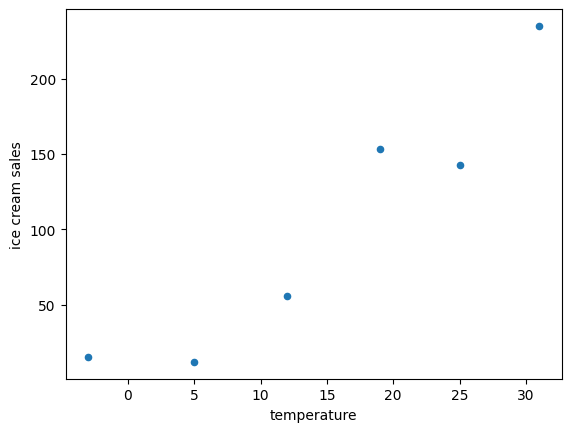

In [ ]:
df_icecream.plot(x="temperature", y="ice cream sales", kind="scatter")

## Split the dataset into input column and target column.

In [ ]:
# extract the "temperature" column as the input X
X = df_icecream[["temperature"]]    # NOTE: X is also pandas.DataFrame

# extract the "ice cream sales" column as the target t
t = df_icecream[["ice cream sales"]]    # NOTE: t is also pandas.DataFrame

display(X)
display(t)

,temperature
0,5
1,25
2,12
3,-3
4,31
5,19


,ice cream sales
0,12
1,143
2,56
3,15
4,235
5,153


## Model parameter optimization using LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

model = LinearRegression()  # model definition (using y=ax+b)
model.fit(X, t)             # model training (obtaining a and b)

print("a =", model.coef_)
print("b =", model.intercept_)

a = [[6.64278318]]
b = [3.79871609]


## [Appendix] Calculate parameters using the result of solving the equations

Compare optimization results with analytically determined parameters

$V[X] = E[X^2] - E[X]^2$

$Cov[X, t] = E[(X - E[X])(t - E[t])]$

$A = \frac{Cov[X, t]}{V[X]}$

$b = E[t] - A * E[X]$

In [ ]:
# convert from dataframe into numpy array
_X = X.to_numpy().reshape(-1) # reshape(-1) means converting to a one-dimensional array while automatically determining the number of elements
_t = t.to_numpy().reshape(-1)

print("_X =", _X)
print("_t =", _t)

# V[X]: variance of X
_X_var = np.sum(_X**2) / _X.shape[0] - np.mean(_X)**2

# COV[X, t]: covariance of X and t
_Xt_cov = np.sum((_X - np.mean(_X)) * (_t - np.mean(_t))) / _X.shape[0]

_a = _Xt_cov / _X_var
_b = np.mean(_t) - _a * np.mean(_X)

print("_a =", _a)
print("_b =", _b)

_X = [ 5 25 12 -3 31 19]
_t = [ 12 143  56  15 235 153]
_a = 6.642783184924416
_b = 3.798716090287826


## Prediction using the regression model

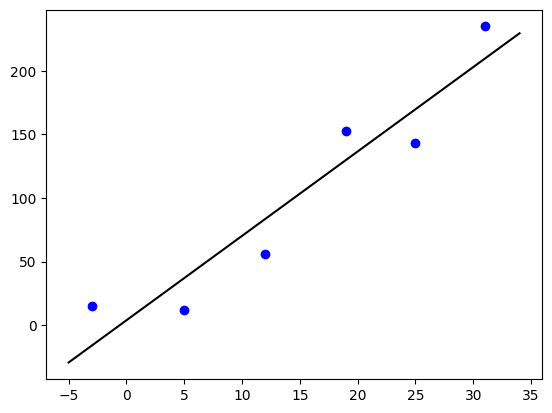

In [ ]:
# X0 is a virtual input to draw the regression line
np_X0 = np.arange(-5, 35, 1)                                # [-5, -4, -3, ... ,34]
X0 = pd.DataFrame(data = np_X0, columns=["temperature"])    # convert into pandas DataFrame

# prediction with X0
y0 = model.predict(X0)

# Show a graph
plt.scatter(X, t, color="blue")     #plot dataset
plt.plot(X0, y0, color="black")  #plot regression line
plt.show()

## Evaluation method for linear regression models

In [ ]:
# obtaining R^2 (coefficient of determination)
R2 = model.score(X, t)

#calculate RMSE
y = model.predict(X)
rmse = np.sqrt( np.average((t - y)**2) )

print("R^2 =", R2)
print("RMSE =", rmse)

R^2 = 0.8933275158301838
RMSE = 26.58571096681376


##🤔 **Exercise 1.1.1**

Perform a linear regression on the Finnish GDP per capita trend data below, and calculate the coefficient of determination $R^2$ and RMSE.


In [ ]:
# Download dataset from Github
!wget https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/gdp_per_capita_finland.csv

df_gdp = pd.read_csv("gdp_per_capita_finland.csv")
df_gdp                                                  # show the dataset

--2024-08-23 17:52:29--  https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/gdp_per_capita_finland.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1157 (1.1K) [text/plain]
Saving to: ‘gdp_per_capita_finland.csv’

gdp_per_capita_finl 100%[===================>]   1.13K  --.-KB/s    in 0s      

2024-08-23 17:52:29 (47.1 MB/s) - ‘gdp_per_capita_finland.csv’ saved [1157/1157]



,year,GDP per capita (USD)
0,1960,1179.353011
1,1961,1327.427224
2,1962,1411.702398
3,1963,1522.319242
4,1964,1707.503938
...,...,...
58,2018,49987.626160
59,2019,48629.858230
60,2020,49169.719340
61,2021,53489.752020


<Axes: xlabel='year'>

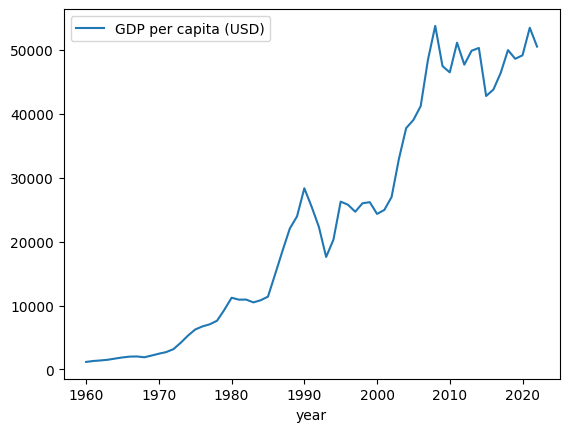

In [ ]:
df_gdp.plot(x="year", y="GDP per capita (USD)", kind="line")

a = [[956.00074674]]
b = [-1880098.4253992]
R^2 = 0.9338062867956027
RMSE = 4628.426969010868


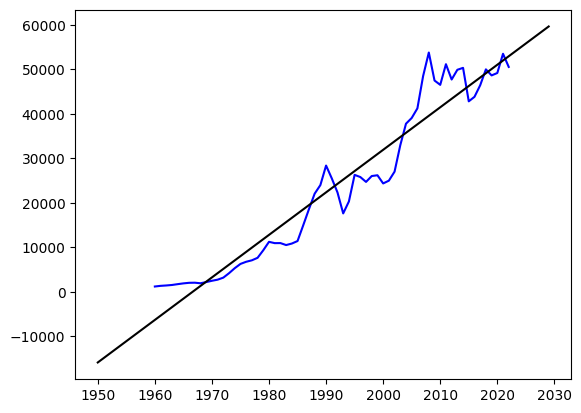

In [ ]:
from sklearn.linear_model import LinearRegression

# =====================================================================
# Exercise 1.1.1

X = df_gdp[["year"]]
t = df_gdp[["GDP per capita (USD)"]]

model = LinearRegression()
model.fit(X, t)
y = model.predict(X)

R2 = model.score(X, t)
rmse = np.sqrt(np.average((t-y)**2))
# =====================================================================

# X0 is a virtual input to draw the regression line
np_X0 = np.arange(1950, 2030, 1)                    # [1950, 1951, ... , 2029]
X0 = pd.DataFrame(data = np_X0, columns=["year"])   # convert to pandas DataFrame

y0 = model.predict(X0)

print("a =", model.coef_)
print("b =", model.intercept_)
print("R^2 =", R2)
print("RMSE =", rmse)

# Show a graph
plt.plot(X, t, c="blue")      # plot the dataset
plt.plot(X0, y0, c="black")   # plot the regression line
plt.show()

##🤔 **Exercise 1.1.2**

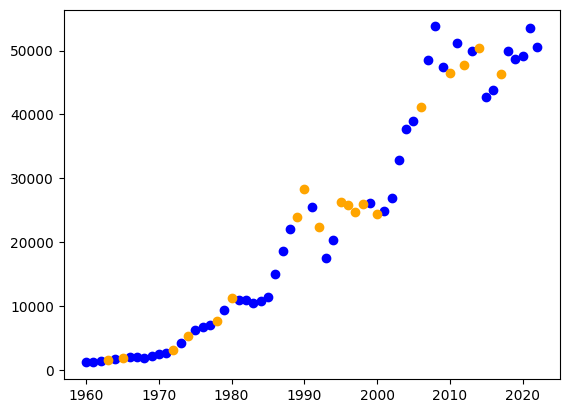

In [ ]:
from sklearn.model_selection import train_test_split

df_gdp = pd.read_csv("gdp_per_capita_finland.csv")
X = df_gdp[["year"]]
t = df_gdp[["GDP per capita (USD)"]]

#Dividing whole dataset into training set and test set
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=47)

plt.scatter(X_train, t_train, c="blue")
plt.scatter(X_test, t_test, c="orange")
plt.show()

W = [[952.25175246]]
b = [-1872722.62909955]
R^2(train) = 0.9316814528748213
R^2(test) = 0.9400239762254443
RMSE(train) = 4913.976180643392
RMSE(test) = 3892.758048752414


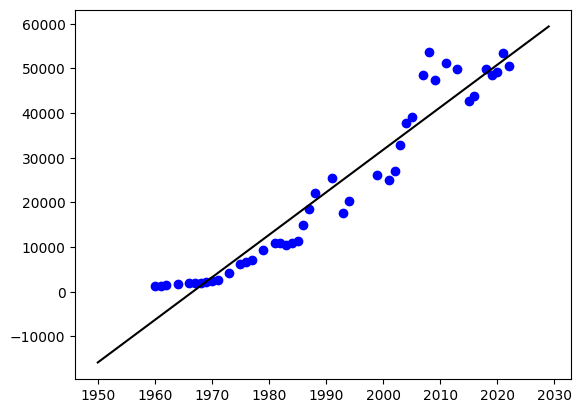

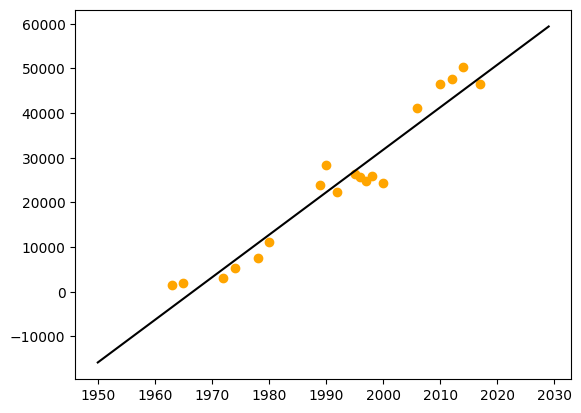

In [ ]:
from sklearn.linear_model import LinearRegression

# =====================================================================
# Exercise 1.1.2
# Make linear regression model and fit it with training data.
# Then calculate R^2 score and RMSE on both training and test set.

model = LinearRegression()
model.fit(X_train, t_train)

y_train = model.predict(X_train)
y_test = model.predict(X_test)

R2_train = model.score(X_train, t_train)
R2_test = model.score(X_test, t_test)
rmse_train =np.sqrt(np.average((t_train - y_train)**2) )
rmse_test = np.sqrt(np.average((t_test - y_test)**2) )

# =====================================================================

# X0 is a virtual input to draw the regression line
np_X0 = np.arange(1950, 2030, 1)                    # [1950, 1951, ... , 2029]
X0 = pd.DataFrame(data = np_X0, columns=["year"])   # convert into pandas DataFrame
y0 = model.predict(X0)

print("W =", model.coef_)
print("b =", model.intercept_)
print("R^2(train) =", R2_train)
print("R^2(test) =", R2_test)
print("RMSE(train) =", rmse_train)
print("RMSE(test) =", rmse_test)

# show a graph
plt.scatter(X_train, t_train, c="blue")
plt.plot(X0, y0, c="black")
plt.show()

# show a graph
plt.scatter(X_test, t_test, c="orange")
plt.plot(X0, y0, c="black")
plt.show()